# ¿Qué vende un coche?

Eres un analista en Crankshaft List. Cientos de anuncios gratuitos de vehículos se publican en tu sitio web cada día. Necesitas estudiar los datos recopilados durante los últimos años y determinar qué factores influyen en el precio de un vehículo.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import matplotlib.pyplot as plt

### Cargar datos

In [2]:
# Carga el archivo de datos en un DataFrame
vh = pd.read_csv('vehicles_us.csv')

### Explorar datos iniciales

El dataset contiene los siguientes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel, etc.
- `odometer` — el millaje del vehículo cuando el anuncio fue publicado
- `transmission`
- `paint_color`
- `is_4wd` — si el vehículo tiene tracción a las 4 ruedas (tipo Booleano)
- `date_posted` — la fecha en la que el anuncio fue publicado
- `days_listed` — desde la publicación hasta que se elimina

[Al comprender los campos, explóralos para familiarizarte con los datos.]

In [3]:
# imprime la información general/resumida sobre el DataFrame
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# imprimir una muestra de datos
vh.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Tenemos los siguientes comentarios sobre las columnas:\
**model_year:** Podemos cambiar el tipo de datos a "int" ya que los años son enteros.\
**model:** Debemos ver si hay posibilidad de agrupar y cambiar el nombre de modelos parecidos\
**cylinders:** Para los valores ausentes, de acuerdo a la expericiencia los modelos con cierto tipo de caractetisticas tienden a tener los mismos cilindros, veremos si es relevante este dato para poder rellenar valores ausentes.\
**odometer:** En este caso de valores ausentes veremos que tan relevante es este dato, ya que rellenar estos datos puede ser contraproducente ya que los vehiculos no son usados de la misma forma o de forma regular por la gente, por lo que poner un kilometraje promedio puede afectar drasticamete el precio, pudiendo ser que el carro tenga un odometro bajo.\
**paint_color**: si bien el color no parece un factor importante para valores ausentes podemos sacar una estadistica de colores mas usados.

Las columnas con mayor numero de valores ausentes son **"is_4wd"** seguido de **"paint_color"** entre los cuales el factor de is_4wd si es importante ya que define gran parte del precio por la caracteristica especial, paint_color no representa un factor importante.

### Conclusiones y siguientes pasos


Tenemos precios de automoviles los cuales se determinan por diferentes factores, en este caso tenemos la tabla con ellos, en algunos casos tenemos columnas con valores ausentes en ciertas columnas criticas como lo es odometro, ya que influye en la determinacion del precio, sin embargo, tenemos que valorar si solventarlos ya que no sabemos con exactitud el valor de este y no es algo que podamos promediar ya que influye en el precio, en cuestion de otras columnas como lo es cylinder, model year, is_4wd, podemos solventarlos de acuerdo a las filas con datos mas parecidos, paint_color no refleja mucha importancia al tener valores ausentes.


1.- Debemos cambiar los datos de **model_year** de float a int\, datos de **date_posted** de object a datetime\
2.- Comprender los valores unicos en las diferentes columnas.\
3.- Debemos homologar los datos en las columnas que sean necesarios en caso de haya algun error o simplemente homologarlos de forma que nos sea mejor el analisis.\
4.- Agruparemos las columnas de model y type para tomar una decision en rellenar valores ausentes en **is_4wd y cylinders**\
5.- Despues de rellenar las columnas anteriores, podemos proseguir con llenar la columna de **model_year** al tener mas informacion y clasificacion de los autos.\
6.-Al final tomaremos una decision sobre los datos de **odometro**, ya que es el dato que mayor puede influir en el precio de un automovil, ya que un automovil puede ser mas antiguo pero con un odometro demasiado bajo, caso contrario a un automovil reciente pero con un odometro muy alto, lo cual puede influir en el precio de venta.


## Tratar los valores ausentes (si hay)

In [5]:
print(vh.isna().sum())

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64


In [6]:
def unicos_columnas(data,column):
    return print(data[column].sort_values().unique())

In [7]:
def rellenar_col(data,column,value):
    data[column] = data[column].fillna(value)
    return data[column]

In [8]:
def corregir_valores(data,column,wrong_value,valor_nuevo):
    data[column] = data[column].replace(wrong_value,valor_nuevo)
    return data[column]

In [9]:
vh['model'].sort_values().unique() #Los datos se encuentran correctos

array(['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade',
       'chevrolet camaro', 'chevrolet camaro lt coupe 2d',
       'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze',
       'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu',
       'chevrolet silverado', 'chevrolet silverado 1500',
       'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd',
       'chevrolet silverado 3500hd', 'chevrolet suburban',
       'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse',
       'chrysler 200', 'chrysler 300', 'chrysler town & country',
       'dodge charger', 'dodge dakota', 'dodge grand caravan',
       'ford econoline', 'ford edge', 'ford escape', 'ford expedition',
       'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd',
       'ford f-250 super duty', 'ford f-350 sd', 'ford f150',
       'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty',
       'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus

In [10]:
# Homologaremos los autos que sean el mismo modelo y puedan tener algun error de escritura o clasificacion
# no podemos agrupar por versiones ya que cada auto es exclusivo de su version aunque su precio sea relativamente similar
# vamos a comprobarlo con algunos grupos que son similares 
print('Camaro')
mean_prices_camaro = vh.query('model == ["chevrolet camaro","chevrolet camaro lt coupe 2d"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_camaro)

print('Silverado')
mean_prices_silverado = vh.query('model == ["chevrolet silverado", "chevrolet silverado 1500","chevrolet silverado 1500 crew", "chevrolet silverado 2500hd","chevrolet silverado 3500hd"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_silverado)

print('Ford')
mean_prices_ford = vh.query('model == ["ford f-150", "ford f-250", "ford f-250 sd","ford f-250 super duty", "ford f-350 sd", "ford f150","ford f150 supercrew cab xlt", "ford f250", "ford f250 super duty","ford f350", "ford f350 super duty", "ford focus", "ford focus se","ford fusion", "ford fusion se"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_ford)

print('GMC')
mean_prices_gmc = vh.query('model == ["gmc sierra", "gmc sierra 1500", "gmc sierra 2500hd2"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_gmc)

print('honda')
mean_prices_honda = vh.query('model == ["honda civic", "honda civic lx"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_honda)

print('jeep')
mean_prices_honda = vh.query('model == ["jeep wrangler", "jeep wrangler unlimited"]'
                             ).pivot_table(index='model',values='price')
print(mean_prices_honda)

Camaro
                                     price
model                                     
chevrolet camaro              13284.961353
chevrolet camaro lt coupe 2d  20525.321543
Silverado
                                      price
model                                      
chevrolet silverado            14223.326515
chevrolet silverado 1500       15629.868263
chevrolet silverado 1500 crew  29099.174917
chevrolet silverado 2500hd     20444.582514
chevrolet silverado 3500hd     25121.658436
Ford
                                    price
model                                    
ford f-150                   14105.922747
ford f-250                   14281.582938
ford f-250 sd                21891.453052
ford f-250 super duty        18930.153527
ford f-350 sd                22159.244068
ford f150                    13007.450943
ford f150 supercrew cab xlt  24877.960245
ford f250                    16830.076696
ford f250 super duty         15696.981081
ford f350                    19331.2

In [11]:
# Homologaremos los valores parecidos
corregir_valores(vh,'model','ford f-150','ford f150')
corregir_valores(vh,'model','ford f-250','ford f250')
corregir_valores(vh,'model',['ford f-250 sd','ford f-250 super duty'],'ford f250 super duty')
corregir_valores(vh,'model','ford f-350 sd','ford f350 super duty')

print(vh['model'].sort_values().unique()) #Los datos se encuentran correctos y corregidos, sigamos con las columnas
print(len(vh['model'].sort_values().unique()))

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'ford ranger' 'ford taurus' 'gmc acadia' 'gmc sierra' 'gmc sierra 1500'
 'gmc sierra 2500hd' 'gmc yukon' 'honda accord' 'honda civic'
 'ho

In [12]:
# Tenemos 25953 valores ausentes en "is_4wd", sin embargo, aqui solo hay dos valores posibles 1,0, si los valores que tenemos son
# 1 osea verdadero, los demas valores ausentes los podemos considerar como 0, ya que suena logico a que si el auto no comparte 
# esta caracteristica quisieron dejar vacio el campo
rellenar_col(vh,'is_4wd',0)

print(vh['is_4wd'].value_counts())
print(len(vh['is_4wd']))
#Se han corregido y se tienen todos los valores

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64
51525


In [13]:
# Ahora revisaremos los valores de paint_color
vh['paint_color'].sort_values().unique()

array(['black', 'blue', 'brown', 'custom', 'green', 'grey', 'orange',
       'purple', 'red', 'silver', 'white', 'yellow', nan], dtype=object)

In [14]:
# Ya que el color pareceria no afectar el precio ya que no es una caracteristica mecanica y tenemos un color llamado 'custom'
# rellenaremos los valores ausentes con este valor, ya que colocar un valor como 'other' seria agregar otra categoria que de 
# igual forma haria referencia a otro color.
rellenar_col(vh,'paint_color','custom')
print(vh['paint_color'].sort_values().unique())
print(vh['paint_color'].value_counts())
print(len(vh['paint_color']))

# Hemos corregido y rellenado los valores en esta columna

['black' 'blue' 'brown' 'custom' 'green' 'grey' 'orange' 'purple' 'red'
 'silver' 'white' 'yellow']
custom    10420
white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64
51525


In [15]:
# Revisaremos la columna 'cylinder'
unicos_columnas(vh,'cylinders')
print(vh[vh['cylinders'] == 12])

[ 3.  4.  5.  6.  8. 10. 12. nan]
       price  model_year                 model  condition  cylinders    fuel  \
12615  18000      2001.0              ram 2500  excellent       12.0  diesel   
44117  20000      2004.0  ford f350 super duty  excellent       12.0  diesel   

       odometer transmission   type paint_color  is_4wd date_posted  \
12615  167500.0       manual  truck      silver     1.0  2018-08-05   
44117       NaN    automatic  truck        grey     1.0  2019-03-29   

       days_listed  
12615           22  
44117           24  


In [16]:
# Revisaremos los valores ausentes de acuerdo a un auto que se tenga de la misma categoria y bucaremos en la base de datos si 
# se tiene un auto similiar
print(vh[vh['cylinders'].isna()]['model'].sort_values().unique())
print(len(vh[vh['cylinders'].isna()]['model'].sort_values().unique()))

['acura tl' 'bmw x5' 'buick enclave' 'cadillac escalade'
 'chevrolet camaro' 'chevrolet camaro lt coupe 2d' 'chevrolet colorado'
 'chevrolet corvette' 'chevrolet cruze' 'chevrolet equinox'
 'chevrolet impala' 'chevrolet malibu' 'chevrolet silverado'
 'chevrolet silverado 1500' 'chevrolet silverado 1500 crew'
 'chevrolet silverado 2500hd' 'chevrolet silverado 3500hd'
 'chevrolet suburban' 'chevrolet tahoe' 'chevrolet trailblazer'
 'chevrolet traverse' 'chrysler 200' 'chrysler 300'
 'chrysler town & country' 'dodge charger' 'dodge dakota'
 'dodge grand caravan' 'ford econoline' 'ford edge' 'ford escape'
 'ford expedition' 'ford explorer' 'ford f150'
 'ford f150 supercrew cab xlt' 'ford f250' 'ford f250 super duty'
 'ford f350' 'ford f350 super duty' 'ford focus' 'ford focus se'
 'ford fusion' 'ford fusion se' 'ford mustang' 'ford mustang gt coupe 2d'
 'ford ranger' 'ford taurus' 'gmc acadia' 'gmc sierra' 'gmc sierra 1500'
 'gmc sierra 2500hd' 'gmc yukon' 'honda accord' 'honda civic'
 'ho

In [17]:
vh_cylinders = vh
vh_cylinders = vh_cylinders.dropna(subset=['cylinders'])
unicos_columnas(vh_cylinders,'cylinders')
print(vh_cylinders.pivot_table(index=['model','cylinders'],aggfunc='count'))

[ 3.  4.  5.  6.  8. 10. 12.]
                             condition  date_posted  days_listed  fuel  \
model             cylinders                                              
acura tl          4.0                3            3            3     3   
                  6.0              208          208          208   208   
bmw x5            6.0              200          200          200   200   
                  8.0               51           51           51    51   
buick enclave     4.0                1            1            1     1   
...                                ...          ...          ...   ...   
volkswagen jetta  5.0              123          123          123   123   
                  6.0                4            4            4     4   
volkswagen passat 4.0              243          243          243   243   
                  5.0               43           43           43    43   
                  6.0               30           30           30    30   

       

In [18]:
vh_cylinders = vh_cylinders.drop_duplicates(subset=['model','transmission','fuel','type','is_4wd','model_year']).reset_index(drop=True)
print(vh_cylinders)
unicos_columnas(vh_cylinders,'cylinders')

      price  model_year                    model  condition  cylinders fuel  \
0      9400      2011.0                   bmw x5       good        6.0  gas   
1     25500         NaN                ford f150       good        6.0  gas   
2      5500      2013.0           hyundai sonata   like new        4.0  gas   
3      1500      2003.0                ford f150       fair        8.0  gas   
4     14900      2017.0             chrysler 200  excellent        4.0  gas   
...     ...         ...                      ...        ...        ...  ...   
7201   3200      2003.0     ford f350 super duty       good       10.0  gas   
7202   4500      1995.0                 ram 3500  excellent       10.0  gas   
7203   3900      2003.0  chrysler town & country  excellent        6.0  gas   
7204   5980      2010.0           subaru impreza  excellent        4.0  gas   
7205  11750      2015.0             honda accord  excellent        4.0  gas   

      odometer transmission       type paint_color 

In [19]:
vh[vh['cylinders'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,custom,0.0,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,custom,0.0,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,0.0,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,0.0,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,custom,0.0,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,1.0,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,0.0,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,0.0,2018-06-22,28


In [20]:
#Arreglaremos la columna de cylinders ahora que comprobamos los valores unicos por cada categoria de model-fuel-transmission-cylinders
# por lo que aaplicando el metodo merge podremos arreglar la columna.
vh[vh['cylinders'].isna()] = vh.merge(vh_cylinders,on='model',how='right')

In [21]:
vh.info()
vh['cylinders'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     50997 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43656 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


8.0     17913
6.0     17091
4.0     15081
10.0      586
5.0       285
3.0        39
12.0        2
Name: cylinders, dtype: int64

In [22]:
vh_cylinders = vh
vh_cylinders = vh_cylinders.dropna(subset=['cylinders'])
vh_cylinders = vh_cylinders.drop_duplicates(subset=['model','transmission','fuel','type','is_4wd','model_year']).reset_index(drop=True)
vh[vh['cylinders'].isna()] = vh.merge(vh_cylinders,on='model',how='right')
vh.info()
vh['cylinders'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47910 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51514 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43657 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


8.0     18141
6.0     17253
4.0     15202
10.0      590
5.0       287
3.0        39
12.0        2
Name: cylinders, dtype: int64

In [23]:
vh.info()
vh['cylinders'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47910 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51514 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43657 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


8.0     18141
6.0     17253
4.0     15202
10.0      590
5.0       287
3.0        39
12.0        2
Name: cylinders, dtype: int64

In [24]:
vh_cylinders = vh
vh_cylinders = vh_cylinders.dropna(subset=['cylinders'])
vh_cylinders = vh_cylinders.drop_duplicates(subset=['model','transmission','fuel','type','is_4wd','model_year']).reset_index(drop=True)
vh[vh['cylinders'].isna()] = vh.merge(vh_cylinders,on='model',how='right')
vh.info()
vh['cylinders'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47910 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43658 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


8.0     18149
6.0     17254
4.0     15204
10.0      590
5.0       287
3.0        39
12.0        2
Name: cylinders, dtype: int64

In [25]:
# Tenemos ya la columna cylinders correcta 
vh.isna().sum()

price              0
model_year      3615
model              0
condition          0
cylinders          0
fuel               0
odometer        7867
transmission       0
type               0
paint_color        0
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

In [26]:
# Para la columna de model_year usaremos el mismo metodo qye utilizamos para encontrar los valores de cylinders,como el año del 
# modelo puede variar utilizaremos las caracteristicas unicas (cylinders, fuel,transmission,type,is_4wd) de los autos 
# que no cuentan con valor ausente en este campo para tener un valor aproximado del año.
vh_model_year = vh
vh_model_year = vh_model_year.dropna(subset=['model_year'])
unicos_columnas(vh_model_year,'model_year')
print(len(vh_model_year['model_year'].unique()))
print(vh_model_year.pivot_table(index=['model','model_year'],aggfunc='count'))

[1908. 1929. 1936. 1948. 1955. 1958. 1960. 1961. 1962. 1963. 1964. 1965.
 1966. 1967. 1968. 1969. 1970. 1971. 1972. 1973. 1974. 1975. 1976. 1977.
 1978. 1979. 1980. 1981. 1982. 1983. 1984. 1985. 1986. 1987. 1988. 1989.
 1990. 1991. 1992. 1993. 1994. 1995. 1996. 1997. 1998. 1999. 2000. 2001.
 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010. 2011. 2012. 2013.
 2014. 2015. 2016. 2017. 2018. 2019.]
66
                              condition  cylinders  date_posted  days_listed  \
model             model_year                                                   
acura tl          1999.0              2          2            2            2   
                  2001.0              6          6            6            6   
                  2002.0              2          2            2            2   
                  2003.0              9          9            9            9   
                  2004.0             15         15           15           15   
...                               

In [27]:
vh_model_year = vh_model_year.drop_duplicates(subset=['model_year','model','cylinders','transmission','fuel','type','is_4wd']).reset_index(drop=True)
print(vh_model_year)
unicos_columnas(vh_model_year,'model_year')
print(len(vh_model_year['model_year'].unique()))

      price  model_year                    model  condition  cylinders fuel  \
0      9400      2011.0                   bmw x5       good        6.0  gas   
1      5500      2013.0           hyundai sonata   like new        4.0  gas   
2      1500      2003.0                ford f150       fair        8.0  gas   
3     14900      2017.0             chrysler 200  excellent        4.0  gas   
4     14990      2014.0             chrysler 300  excellent        6.0  gas   
...     ...         ...                      ...        ...        ...  ...   
8015   4500      1995.0                 ram 3500  excellent       10.0  gas   
8016   3900      2003.0  chrysler town & country  excellent        6.0  gas   
8017  16900      2016.0            ford explorer  excellent        4.0  gas   
8018   5980      2010.0           subaru impreza  excellent        4.0  gas   
8019  11750      2015.0             honda accord  excellent        4.0  gas   

      odometer transmission       type paint_color 

In [28]:
vh[vh['model_year'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
9,9950,NaN,bmw x5,excellent,6.0,gas,NaN,automatic,SUV,silver,1.0,2018-07-05,8
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f150,excellent,6.0,gas,108500.0,automatic,pickup,white,0.0,2018-09-23,15
69,7800,NaN,ford f150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,1.0,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,SUV,silver,1.0,2019-04-18,13
51487,1495,NaN,ford f150,fair,6.0,gas,15804.0,manual,truck,white,1.0,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,1.0,2018-12-27,37


In [29]:
#Arreglaremos la columna de cylinders ahora que comprobamos los valores unicos por cada categoria de model-fuel-transmission-cylinders
# por lo que aaplicando el metodo merge podremos arreglar la columna.
vh[vh['model_year'].isna()] = vh.merge(vh_model_year,on='model',how='right')

In [30]:
vh.info()
vh['model_year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51286 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43662 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


2013.0    3917
2014.0    3736
2012.0    3650
2011.0    3621
2015.0    3595
          ... 
1955.0       1
1948.0       1
1961.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 66, dtype: int64

In [31]:
vh_model_year = vh
vh_model_year = vh_model_year.dropna(subset=['model_year'])
vh_model_year = vh_model_year.drop_duplicates(subset=['model_year','model','cylinders','transmission','fuel','type','is_4wd']).reset_index(drop=True)
vh[vh['model_year'].isna()] = vh.merge(vh_model_year,on='model',how='right')

In [32]:
vh.info()
vh['model_year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51521 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43668 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


2013.0    3939
2014.0    3758
2012.0    3667
2011.0    3635
2015.0    3614
          ... 
1955.0       1
1948.0       1
1961.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 66, dtype: int64

In [33]:
# Veamos los valores ausentes que solo son 4
print(vh[vh['model_year'].isna()])


       price  model_year                model  condition  cylinders    fuel  \
1       9950         NaN               bmw x5  excellent        6.0     gas   
16149  15000         NaN             ram 1500       good        8.0     gas   
23649  18995         NaN  chevrolet silverado  excellent        8.0  diesel   
33501   7500         NaN            ford f150  excellent        8.0     gas   

       odometer transmission    type paint_color  is_4wd date_posted  \
1           NaN    automatic     SUV      silver     1.0  2018-07-05   
16149   97000.0    automatic  pickup        blue     0.0  2018-08-12   
23649  104000.0    automatic  pickup        grey     1.0  2018-06-25   
33501  140732.0    automatic   truck      custom     0.0  2019-04-17   

       days_listed  
1                8  
16149           36  
23649           57  
33501           35  


In [34]:
# Veamos si no hay un valor parecido a estos para poder solventarlos
print(vh[vh['model'] == 'bmw x5']['model_year'].median())
print(vh[vh['model'] == 'ram 1500']['model_year'].median())
print(vh[vh['model'] == 'chevrolet silverado']['model_year'].median())
print(vh[vh['model'] == 'ford f150']['model_year'].median())

2010.0
2012.0
2008.0
2011.0


In [35]:
# Tomaremos un valor de la lista ya que 4 datos no representan gran porcentaje en una muestra de mas de 50mil autos
vh['model_year'] = vh['model_year'].fillna(2010)

In [36]:
vh.info()
vh['model_year'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43668 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


2013.0    3939
2014.0    3758
2012.0    3667
2011.0    3635
2015.0    3614
          ... 
1955.0       1
1948.0       1
1961.0       1
1936.0       1
1929.0       1
Name: model_year, Length: 66, dtype: int64

In [37]:
# El odometro es algo que es dificil de predecir en caso de no tenerlo ya que cada persona varia el uso que le da al auto,entonce
# veremos que es mas apto si llenarlos con una media o una mediana
vh['odometer'].describe()

count     43668.000000
mean     115088.782197
std       64776.663727
min           0.000000
25%       70000.000000
50%      112698.000000
75%      154620.500000
max      990000.000000
Name: odometer, dtype: float64

In [38]:
# Usaremos la media ya que al no saber el valor correcto usaremos el mas alto entre media y mediana
mean_odometer = vh['odometer'].mean()
vh['odometer'] = vh['odometer'].fillna(mean_odometer)

In [39]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [40]:
unicos_columnas(vh,'condition') #Los datos se encuentran correctos

['excellent' 'fair' 'good' 'like new' 'new' 'salvage']


In [41]:
unicos_columnas(vh,'fuel') #Los datos se encuentran correctos

['diesel' 'electric' 'gas' 'hybrid' 'other']


In [42]:
unicos_columnas(vh,'transmission') #Los datos se encuentran correctos

['automatic' 'manual' 'other']


In [43]:
unicos_columnas(vh,'type') #Los datos se encuentran correctos, talves podriamos agrupar ciertos tipos como van-wagon y truck-pickup para reducir la muestra

['SUV' 'bus' 'convertible' 'coupe' 'hatchback' 'mini-van' 'offroad'
 'other' 'pickup' 'sedan' 'truck' 'van' 'wagon']


In [44]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Corregir los tipos de datos

In [45]:
# Cambiaremos la columna model_year a int
vh['model_year'] = vh['model_year'].astype('int')

In [46]:
# Cambiaremos la columna cylinders a int
vh['cylinders'] = vh['cylinders'].astype('int')

In [47]:
# Cambiaremos la columna is_4wd a int
vh['is_4wd'] = vh['is_4wd'].astype('int')

In [48]:
# Cambiaremos la columna is_4wd a int
vh['odometer'] = vh['odometer'].astype('int')

In [49]:
# Cambiaremos la columna date_posted a datetime
vh['date_posted'] = pd.to_datetime(vh['date_posted'],format='%Y-%m-%d')

In [50]:
# Verificamos que nuestros tipos de datos estan correctos
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int64(2), object(6)
memory usage: 4.3+ MB


## Enriquecer datos

In [51]:
vh.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,custom,1,2018-06-23,19
1,9950,2010,bmw x5,excellent,6,gas,115088,automatic,SUV,silver,1,2018-07-05,8
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79
3,1500,2003,ford f150,fair,8,gas,115088,automatic,pickup,custom,0,2019-03-22,9
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28


In [52]:
# Agrega valores de fecha y hora para cuando se colocó el anuncio
vh['date_year'] = pd.DatetimeIndex(vh['date_posted']).year

In [53]:
# Agrega los años del vehículo cuando el anuncio se colocó en años
vh['car_life'] = vh['date_year'] - vh['model_year']

In [54]:
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  date_year     51525 non-null  int64         
 14  car_life      51525 non-null  int64         
dtypes: datetime64[ns](1), int32(4), int6

In [55]:
# Creamos una funcion para realizar el promedio por vehiculo
def prom_odo_year(row):
    if row['car_life'] == 0:
        col_odo_prom = row['odometer']
        return col_odo_prom
    else:
        col_odo_prom = (row['odometer'] / row['car_life'])
        return col_odo_prom

In [56]:
# Agrega el millaje promedio del vehículo por año
vh['odo_prom'] = vh.apply(prom_odo_year,axis=1)

In [57]:
# Podría ser útil reemplazar los valores de condición con algo que se pueda manipular más fácilmente
vh['condition'].unique()

array(['good', 'excellent', 'like new', 'fair', 'salvage', 'new'],
      dtype=object)

Agruparemos de la siguiente forma:\
**new** = new\
**semi new** = excellent, like new\
**regular** = good, fair\
**salvage** = recovery


In [58]:
corregir_valores(vh,'condition',['excellent', 'like new'],'semi new')
corregir_valores(vh,'condition',['good', 'fair'],'regular')
corregir_valores(vh,'condition','salvage','recovery')

0         regular
1        semi new
2        semi new
3         regular
4        semi new
           ...   
51520    semi new
51521    recovery
51522    semi new
51523     regular
51524     regular
Name: condition, Length: 51525, dtype: object

In [59]:
vh['condition'].unique()

array(['regular', 'semi new', 'recovery', 'new'], dtype=object)

## Comprobar datos limpios

In [60]:
# imprime la información general/resumida sobre el DataFrame
vh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int32         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int32         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int32         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int32         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  date_year     51525 non-null  int64         
 14  car_life      51525 non-null  int64         
 15  odo_prom      51525 non-null  float6

In [61]:
# imprimir una muestra de datos
vh.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_year,car_life,odo_prom
0,9400,2011,bmw x5,regular,6,gas,145000,automatic,SUV,custom,1,2018-06-23,19,2018,7,20714.285714
1,9950,2010,bmw x5,semi new,6,gas,115088,automatic,SUV,silver,1,2018-07-05,8,2018,8,14386.000000
2,5500,2013,hyundai sonata,semi new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,2019,6,18333.333333
3,1500,2003,ford f150,regular,8,gas,115088,automatic,pickup,custom,0,2019-03-22,9,2019,16,7193.000000
4,14900,2017,chrysler 200,semi new,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,2019,2,40451.500000
5,14990,2014,chrysler 300,semi new,6,gas,57954,automatic,sedan,black,1,2018-06-20,15,2018,4,14488.500000
6,12990,2015,toyota camry,semi new,4,gas,79212,automatic,sedan,white,0,2018-12-27,73,2018,3,26404.000000
7,15990,2013,honda pilot,semi new,6,gas,109473,automatic,SUV,black,1,2019-01-07,68,2019,6,18245.500000
8,11500,2012,kia sorento,semi new,4,gas,104174,automatic,SUV,custom,1,2018-07-16,19,2018,6,17362.333333
9,6200,2007,bmw x5,semi new,6,gas,125000,automatic,SUV,green,1,2019-03-20,8,2019,12,10416.666667


## Estudiar parámetros principales


Los parámetros son:
- Precio
- Los años del vehículo cuando el anuncio se colocó
- Millaje
- Número de cilindros
- Estado

In [62]:
param = ['price','car_life','odometer','cylinders','condition']

**Realizaremos un sondeo**\
Ya que tenemos un descripcion general de los parametros , analizaremos cada parametro con un diagrama de caja para revisar los valores atípicos y poder hacer correciones y descartar estos valores para tener un valor mas consiso a la hora de graficar

In [63]:
def gral_plot_param(data,column):
    gral_descrip = print('Valores generales del parametro:',column)
    describe = data[column].describe()
    print(describe)
    box = data.boxplot(column)
    hist = data.hist(column,bins=100)
    plt.show()

Valores generales del parametro: price
count     51525.000000
mean      12147.108724
std        9886.524698
min           1.000000
25%        5000.000000
50%        9200.000000
75%       16950.000000
max      375000.000000
Name: price, dtype: float64


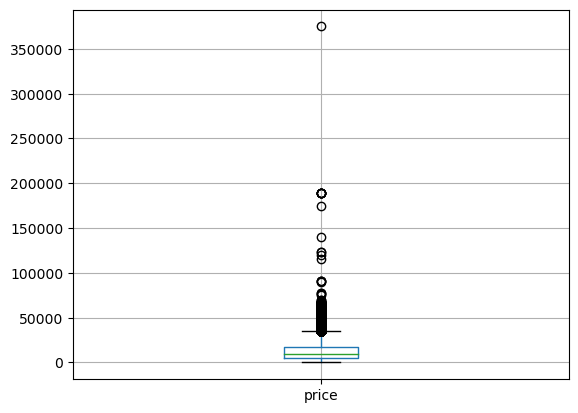

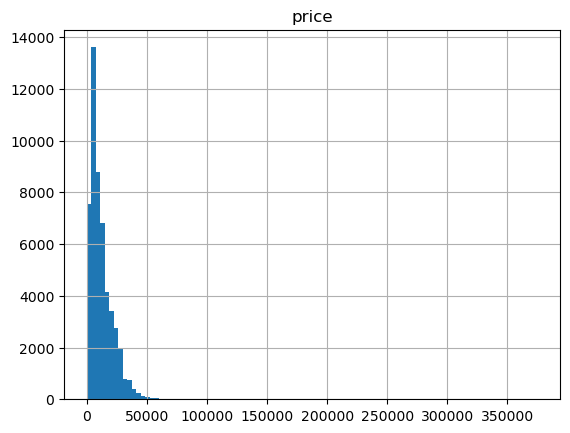

In [64]:
gral_plot_param(vh,'price')

Valores generales del parametro: car_life
count    51525.000000
mean         8.504435
std          6.235546
min          0.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: car_life, dtype: float64


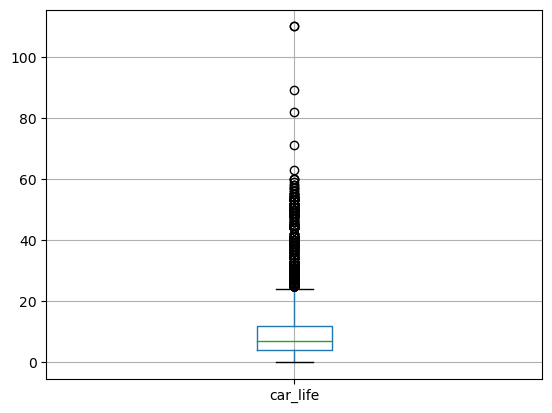

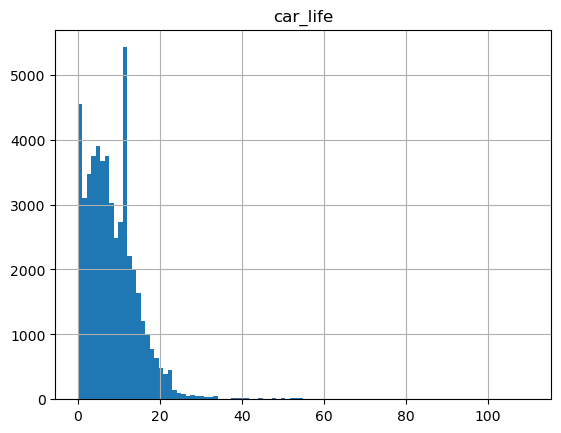

In [65]:
gral_plot_param(vh,'car_life')

Valores generales del parametro: odometer
count     51525.000000
mean     115088.662921
std       59633.523192
min           0.000000
25%       78999.000000
50%      115088.000000
75%      146000.000000
max      990000.000000
Name: odometer, dtype: float64


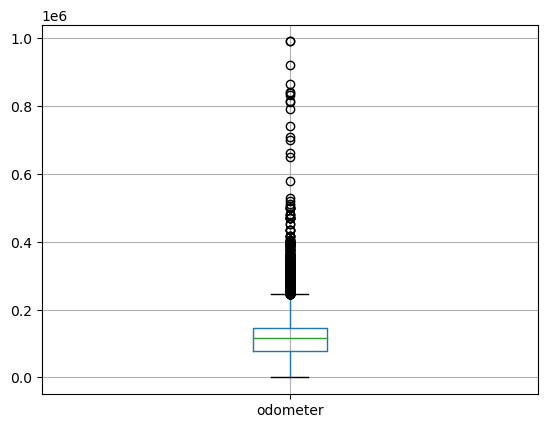

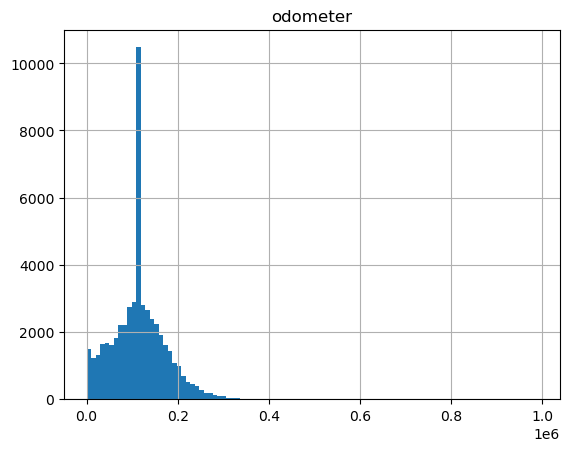

In [66]:
gral_plot_param(vh,'odometer')

           model
cylinders       
8          18364
6          17243
4          15024
10           584
5            270
3             38
12             2
AxesSubplot(0.125,0.11;0.775x0.77)


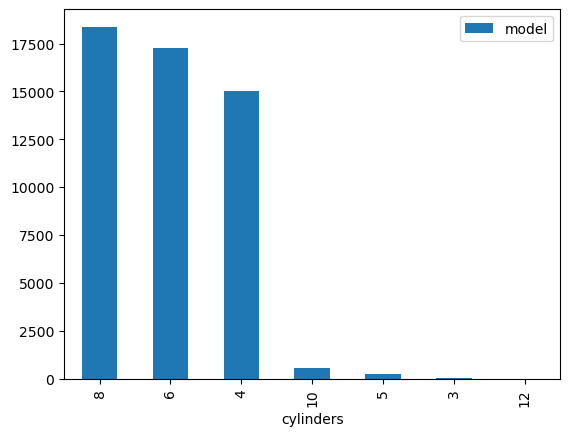

In [67]:
cylinders = vh.pivot_table(index='cylinders',values='model',aggfunc='count')
print(cylinders.sort_values(by='model',ascending=False))
print(cylinders.sort_values(by='model',ascending=False).plot(kind='bar'))
plt.show()

           model
condition       
semi new   29711
regular    21549
new          149
recovery     116


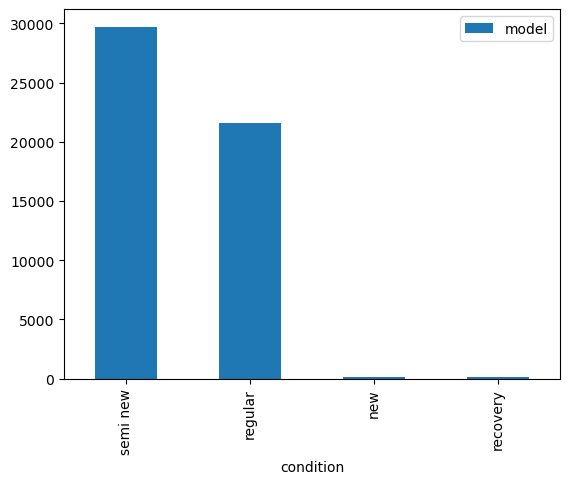

In [68]:
condition = vh.pivot_table(index='condition',values='model',aggfunc='count')
print(condition.sort_values(by='model',ascending=False))
condition.sort_values(by='model',ascending=False).plot(kind='bar')
plt.show()

Como podemos ver, la muestra de los datos en las columnas de **price y odometer** tienen valores atipicos muy por fuera de la de media, veremos que porcentaje de datos atipicos son respecto a el total y como se refleja el grafico y la muestra sin estos datos.

## Estudiar y tratar valores atípicos

Ya realizamos un sondeo para cada parametro que utilizaremos, usamos diagramas de caja y el metodo describe para obtener referencias de valores, eliminaremos los valores fuera del diagrama de caja y veremos de igual forma como se comportan estos valores.

Valores generales del parametro: price
count     51525.000000
mean      12147.108724
std        9886.524698
min           1.000000
25%        5000.000000
50%        9200.000000
75%       16950.000000
max      375000.000000
Name: price, dtype: float64


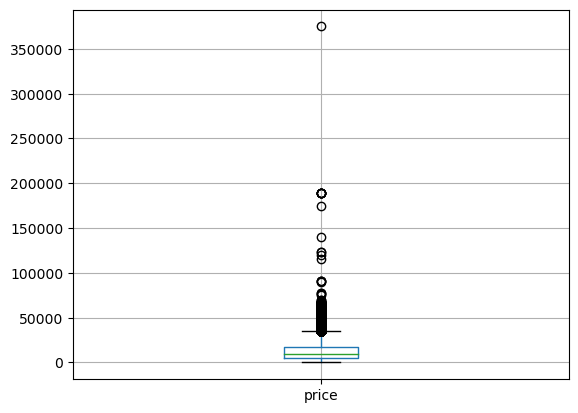

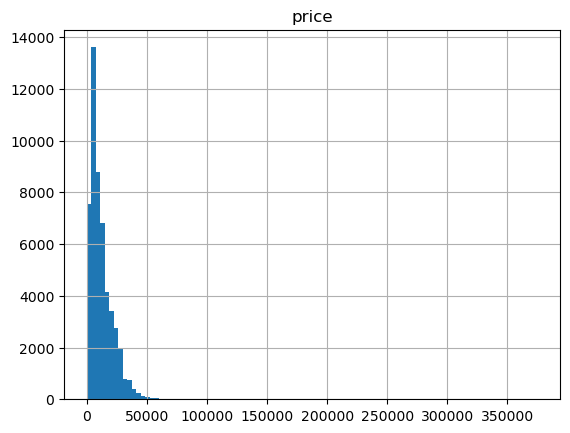

In [69]:
gral_plot_param(vh,'price')

Porcentaje sin valores atípicos: 0.7505288694808345
                   price
model                   
acura tl             200
bmw x5               333
buick enclave        198
cadillac escalade    171
chevrolet camaro     260
...                  ...
toyota tacoma        430
toyota tundra        343
volkswagen jetta     432
volkswagen passat    285
All                38671

[95 rows x 1 columns]


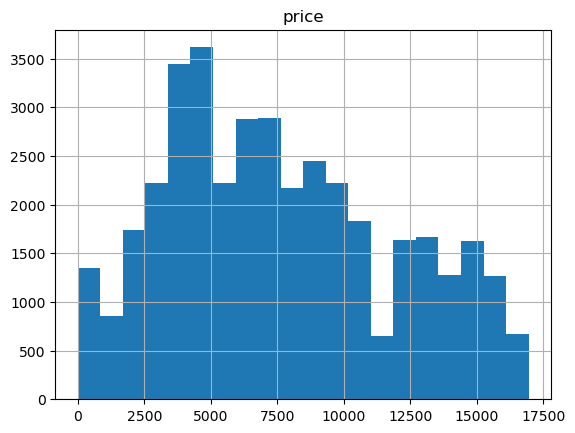

In [70]:
q3_price = vh['price'].quantile(0.75)
sample_price = vh.query('price <= @q3_price')
print('Porcentaje sin valores atípicos:',len(sample_price)/len(vh))
print(sample_price.pivot_table(index='model',values='price',aggfunc='count',margins=True))
sample_price.hist('price',bins=20)
plt.show()

Podemos apreciar que el 75% de los valores se encuentran dentro del rango de 0 a 16950 dolares, pero tenemos valores iguales a 1 veamos si podemos reducirlos ya que 1 no es un precio razonable, veamos con un histograma reducido esos valores

In [71]:
sample_price.hist('price',bins=20,range=(0,1000))
print(len(sample_price.query('price <= 1000')))
print(len(sample_price.query('price <= 100')))

1592
874


Volveremos a filtrar y a eliminar ese pico de datos con precio menor a 150 dolares

Porcentaje sin valores atípicos: 0.7325376031052887
                   price
model                   
acura tl             200
bmw x5               333
buick enclave        198
cadillac escalade    170
chevrolet camaro     215
...                  ...
toyota tacoma        429
toyota tundra        300
volkswagen jetta     428
volkswagen passat    282
All                37744

[95 rows x 1 columns]


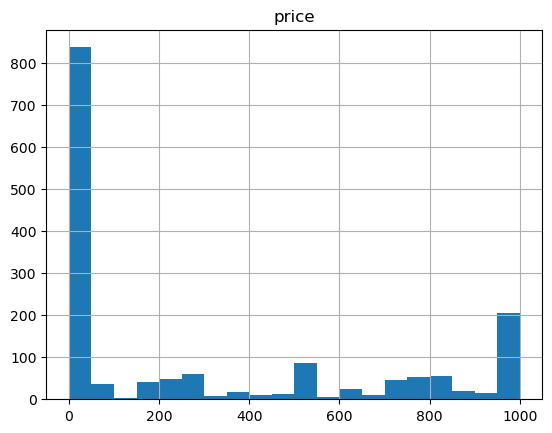

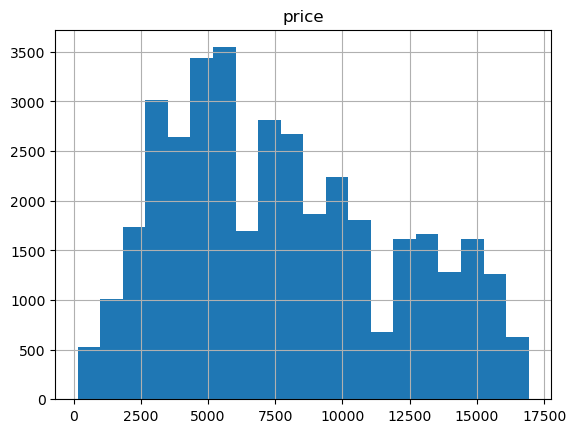

In [72]:
sample_price = vh.query('price < @q3_price and price > 150')
print('Porcentaje sin valores atípicos:',len(sample_price)/len(vh))
print(sample_price.pivot_table(index='model',values='price',aggfunc='count',margins=True))
sample_price.hist('price',bins=20)
plt.show()

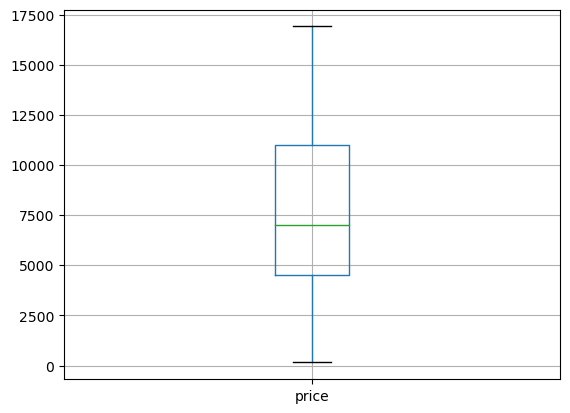

In [73]:
sample_price.boxplot('price')
plt.show()

Listo, nuestros datos de precio ahora tienen mas sentido, tenemos autos que tienen cierto valor ya sea muy bajo pero no igual a 1 dolar, algo completamente ilogico, y autos con un precio tope de 17000, nuestra grafica tiene mas sentido ahora, continuaremos con el siguiente parametro.

Valores generales del parametro: car_life
count    37744.000000
mean        10.076357
std          5.797445
min          0.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        110.000000
Name: car_life, dtype: float64


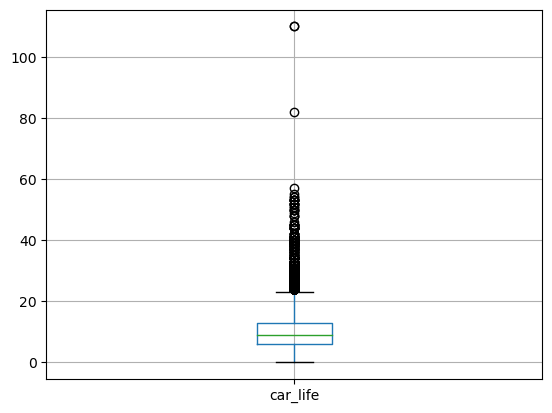

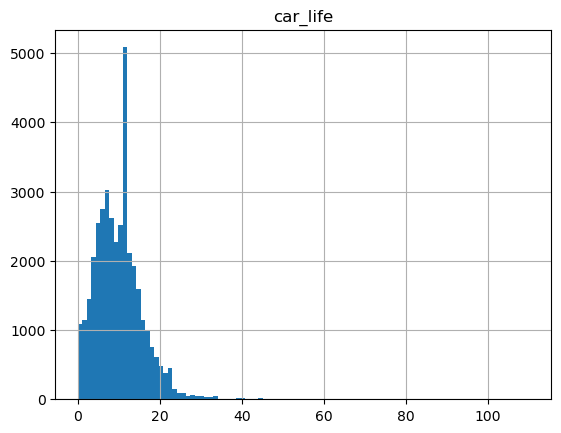

In [74]:
gral_plot_param(sample_price,'car_life')

Repetiremos nuestro proceso ahora para la columna de **car_life**, teniendo en cuenta que ya tenemos un dataframe filtrado seguiremos trabajando con este y seguiremos aplicando filtros y revisando sus valores

Porcentaje sin valores atípicos: 0.5559049005337215
                   car_life
model                      
acura tl                158
bmw x5                  261
buick enclave           198
cadillac escalade       112
chevrolet camaro        147
...                     ...
toyota tacoma           281
toyota tundra           197
volkswagen jetta        385
volkswagen passat       247
All                   28643

[94 rows x 1 columns]


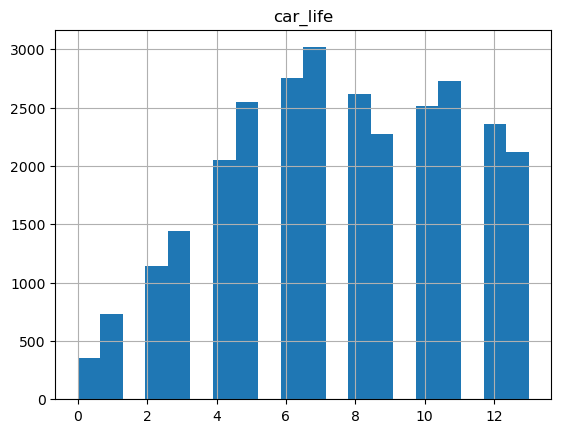

In [75]:
q3_car_life = sample_price['car_life'].quantile(0.75)
sample_car_life = sample_price.query('car_life <= @q3_car_life')
print('Porcentaje sin valores atípicos:',len(sample_car_life)/len(vh))
print(sample_car_life.pivot_table(index='model',values='car_life',aggfunc='count',margins=True))
sample_car_life.hist('car_life',bins=20)
plt.show()

Porcentaje de valores atípicos: 0.1766327025715672
                    car_life
model                       
acura tl                  42
bmw x5                    72
cadillac escalade         58
chevrolet camaro          68
chevrolet colorado        16
...                      ...
toyota tacoma            148
toyota tundra            103
volkswagen jetta          43
volkswagen passat         35
All                     9101

[81 rows x 1 columns]


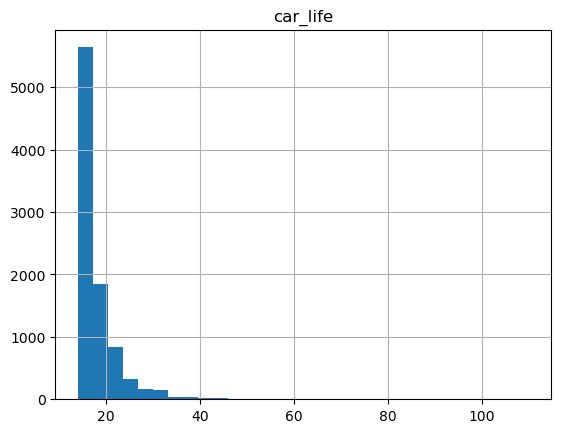

In [76]:
sample_car_life_atip = sample_price.query('car_life > @q3_car_life')
print('Porcentaje de valores atípicos:',len(sample_car_life_atip)/len(vh))
print(sample_car_life_atip.pivot_table(index='model',values='car_life',aggfunc='count',margins=True))
sample_car_life_atip.hist('car_life',bins=30)
plt.show()

Parece que tenemos una gran cantidad de datos fuera de nuestro filtrado, filtraremos nuevamente e incluiremos los valores hasta 25 años

Porcentaje sin valores atípicos: 0.7221931101407084
                   car_life
model                      
acura tl                200
bmw x5                  333
buick enclave           198
cadillac escalade       169
chevrolet camaro        203
...                     ...
toyota tacoma           428
toyota tundra           300
volkswagen jetta        428
volkswagen passat       282
All                   37211

[95 rows x 1 columns]


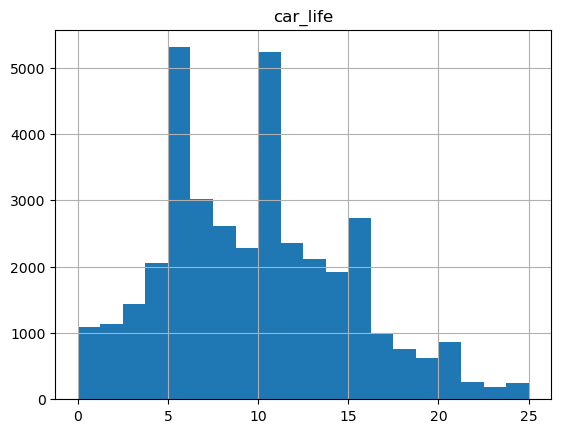

In [77]:
sample_car_life = sample_price.query('car_life <= 25')
print('Porcentaje sin valores atípicos:',len(sample_car_life)/len(vh))
print(sample_car_life.pivot_table(index='model',values='car_life',aggfunc='count',margins=True))
sample_car_life.hist('car_life',bins=20)
plt.show()

Mucho mejor nuestro grafico, teniendo en cuenta que tenemos el 72% de valores totales, siendo muy parecido nuestro porcentaje a nuestro primer filtrado, tenemos que tener en cuenta aqui que los valores 0 son posibles ya que puede haber vehiculos que hayan sido comprados y puestos a la venta el mismo año, por lo que ese valor queda sin modificaciones, continuaremos a revisar el parametro de odometro.

Valores generales del parametro: odometer
count     37211.000000
mean     129154.378813
std       57129.108586
min           0.000000
25%      100000.000000
50%      117000.000000
75%      159508.000000
max      990000.000000
Name: odometer, dtype: float64


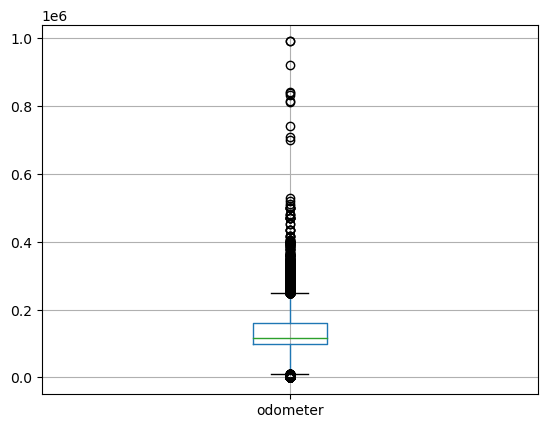

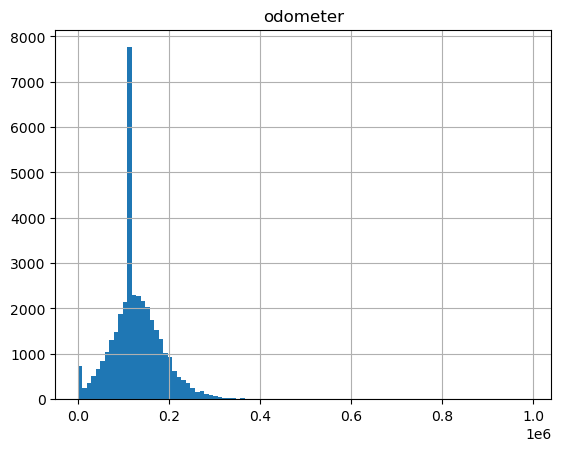

In [78]:
gral_plot_param(sample_car_life,'odometer')

Porcentaje sin valores atípicos: 0.5416593886462883
                   odometer
model                      
acura tl                130
bmw x5                  287
buick enclave           164
cadillac escalade       111
chevrolet camaro        185
...                     ...
toyota tacoma           246
toyota tundra           165
volkswagen jetta        370
volkswagen passat       260
All                   27909

[95 rows x 1 columns]


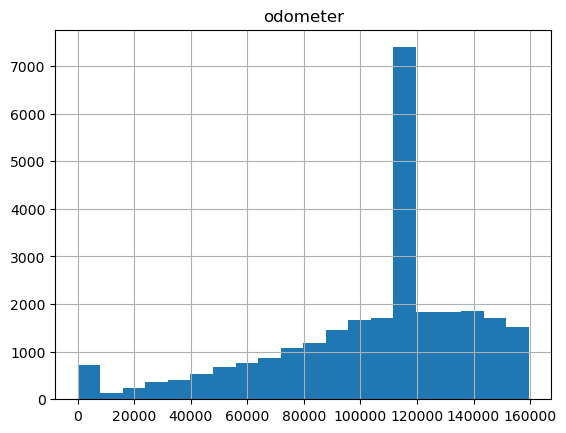

In [79]:
q3_odometer = sample_car_life['odometer'].quantile(0.75)
sample_odometer = sample_car_life.query('odometer <= @q3_odometer')
print('Porcentaje sin valores atípicos:',len(sample_odometer)/len(vh))
print(sample_odometer.pivot_table(index='model',values='odometer',aggfunc='count',margins=True))
sample_odometer.hist('odometer',bins=20)
plt.show()

Ahora veamos los valores que dejamos fuera para verificar su constancia

Porcentaje sin valores atípicos: 0.18053372149442018
                   odometer
model                      
acura tl                 70
bmw x5                   46
buick enclave            34
cadillac escalade        58
chevrolet camaro         18
...                     ...
toyota tacoma           182
toyota tundra           135
volkswagen jetta         58
volkswagen passat        22
All                    9302

[92 rows x 1 columns]


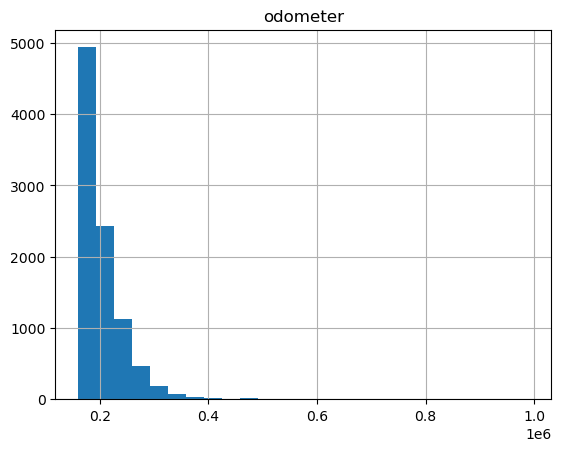

In [80]:
sample_odometer = sample_car_life.query('odometer > @q3_odometer')
print('Porcentaje sin valores atípicos:',len(sample_odometer)/len(vh))
print(sample_odometer.pivot_table(index='model',values='odometer',aggfunc='count',margins=True))
sample_odometer.hist('odometer',bins=25)
plt.show()

Tenemos una gran cantidad de datos fuera de nuestra muestra, los incluiremos hasta un valor de 250000, ya que es donde los datos comienzan a descender de forma drastica y los valores tienden a ser muy altos y muy pocos lo que puede meter ruido a nuestros datos.

Porcentaje sin valores atípicos: 0.7035225618631732
                   odometer
model                      
acura tl                197
bmw x5                  333
buick enclave           198
cadillac escalade       167
chevrolet camaro        203
...                     ...
toyota tacoma           396
toyota tundra           284
volkswagen jetta        420
volkswagen passat       281
All                   36249

[95 rows x 1 columns]


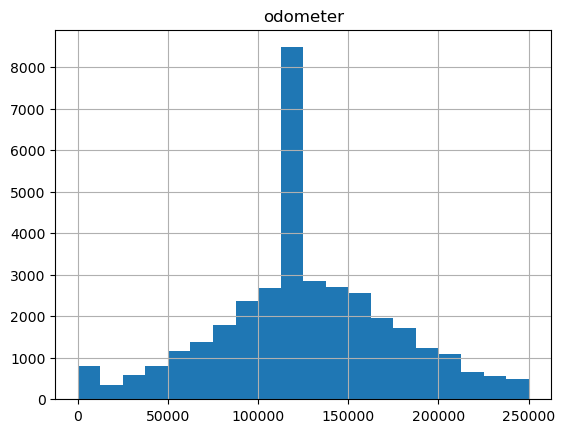

In [81]:
sample_odometer = sample_car_life.query('odometer <= 250000')
print('Porcentaje sin valores atípicos:',len(sample_odometer)/len(vh))
print(sample_odometer.pivot_table(index='model',values='odometer',aggfunc='count',margins=True))
sample_odometer.hist('odometer',bins=20)
plt.show()

Podemos observar una muestra mas constante en cuanto a valores, tenemos un pico alrededor de las 125000 millas, al igual que el parametro de car_life, dejaremos los valores bajos cercanos al cero, ya que un vehiculo puede tener varios años despues de su compra pero poco uso y por consiguiente poco millaje, ademas que tenemos una gran cantidad de datos en este rango, caso contrario a los autos que tienen mas millaje de 250000 ya que son contados estos autos y pueden meter ruido a nuestra muestra, por lo pronto usaremos nuestra tabla o muestra **sample_odometer** que cambiaremos de nombre a **vh_sample**, terminando con un porcentaje de datos del 70% respecto a la muestra total.

In [82]:
vh_sample = sample_odometer

## Estudiar parámetros principales sin valores atípicos

[Utiliza los datos filtrados para crear nuevos histogramas. Compáralos con los histogramas anteriores (aquellos con los valores atípicos incluidos). Saca conclusiones de cada histograma.]

In [83]:
def filt_param(data,column):
    print(data[column].describe())
    data.hist(column,bins=100)
    plt.show()

count    36249.000000
mean      7911.871665
std       4146.658199
min        155.000000
25%       4500.000000
50%       7000.000000
75%      10995.000000
max      16925.000000
Name: price, dtype: float64


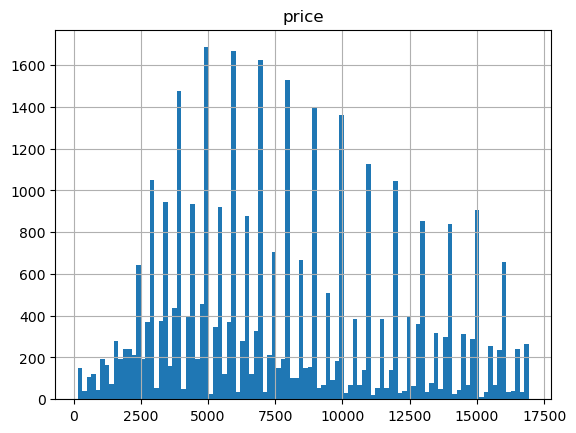

In [84]:
# Datos de price
filt_param(vh_sample,'price')

count    36249.000000
mean         9.615796
std          5.024323
min          0.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         25.000000
Name: car_life, dtype: float64


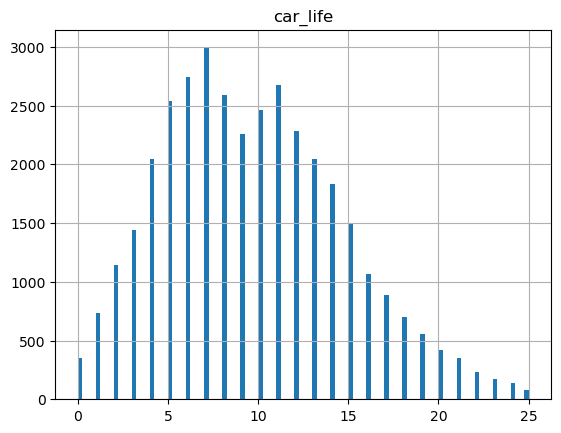

In [85]:
# Datos de car_life
filt_param(vh_sample,'car_life')

count     36249.000000
mean     124667.841568
std       49274.626111
min           0.000000
25%       99000.000000
50%      115088.000000
75%      155500.000000
max      250000.000000
Name: odometer, dtype: float64


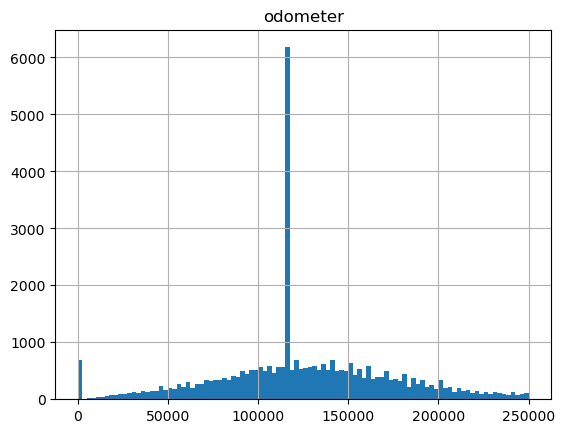

In [86]:
# Datos de odometer
filt_param(vh_sample,'odometer')

           model
cylinders       
4          13905
6          11558
8          10357
5            265
10           130
3             34


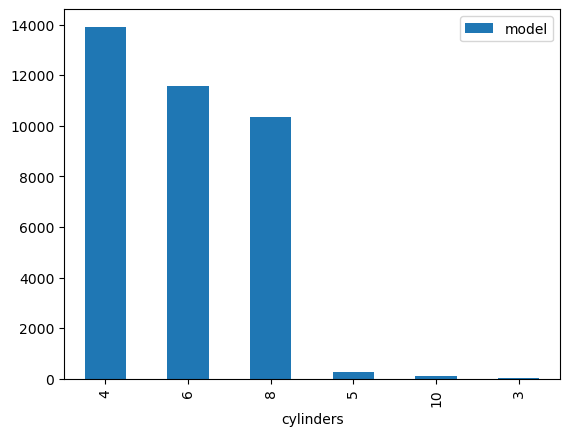

In [87]:
cylinders_sample = vh_sample.pivot_table(index='cylinders',values='model',aggfunc='count')
print(cylinders_sample.sort_values(by='model',ascending=False))
cylinders_sample.sort_values(by='model',ascending=False).plot(kind='bar')
plt.show()

           model
condition       
semi new   29711
regular    21549
new          149
recovery     116


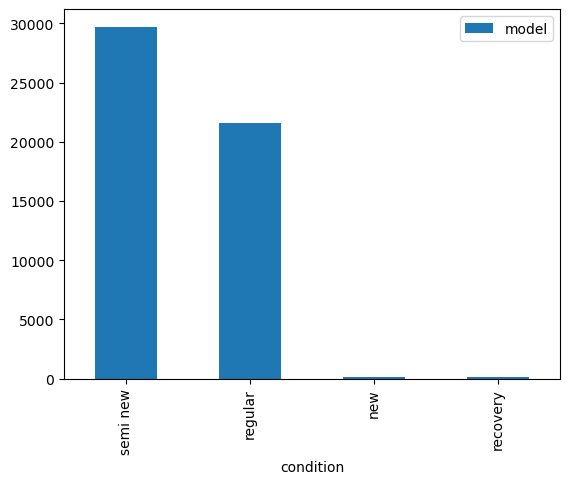

In [88]:
condition_sample = vh.pivot_table(index='condition',values='model',aggfunc='count')
print(condition_sample.sort_values(by='model',ascending=False))
condition_sample.sort_values(by='model',ascending=False).plot(kind='bar')
plt.show()

Haremos la comparacion de los datos filtrados contra los originales

In [89]:
def hist_compar(data1,column,data2):
    print('Comparacion de datos de valores atipicos y sin atipicos del parametro',column)
    data1[column].hist(bins=25)
    data2[column].hist(bins=25)
    plt.show()

Comparacion de datos de valores atipicos y sin atipicos del parametro price


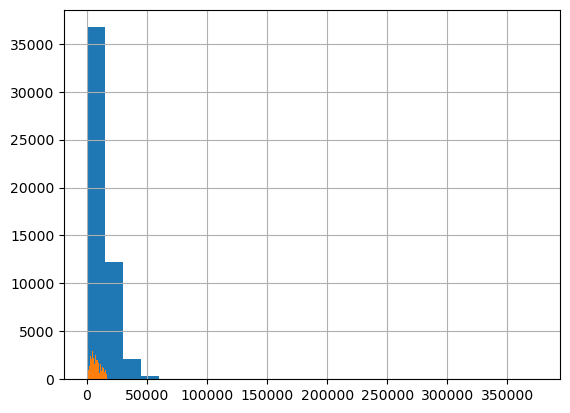

In [90]:
hist_compar(vh,'price',vh_sample)

Comparacion de datos de valores atipicos y sin atipicos del parametro car_life


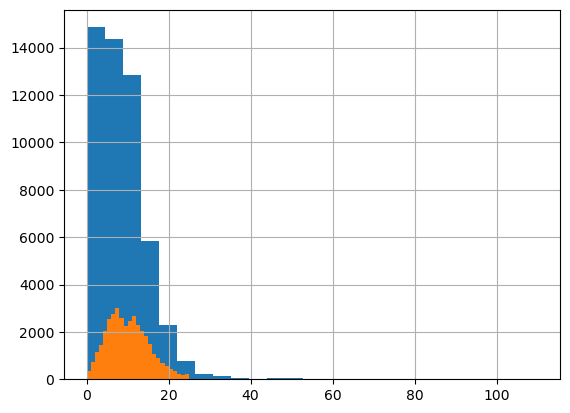

In [91]:
hist_compar(vh,'car_life',vh_sample)

Comparacion de datos de valores atipicos y sin atipicos del parametro odometer


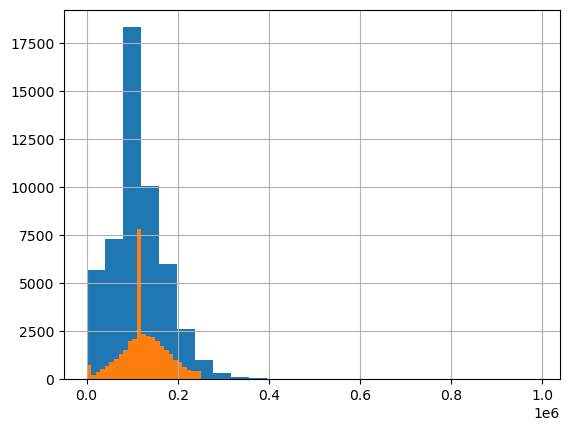

In [92]:
hist_compar(vh,'odometer',vh_sample)

## Periodo de colocación de los anuncios

[Estudia cuántos días los anuncios fueron mostrados (`days_listed`). Calcula la media y la mediana. Describe el periodo de colocación habitual de un anuncio. Determina cuándo se eliminaron rápidamente los anuncios y cuándo son publicados por un tiempo anormalmente largo.]

Valores generales del parametro: days_listed
count    36249.000000
mean        39.636873
std         28.332558
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64


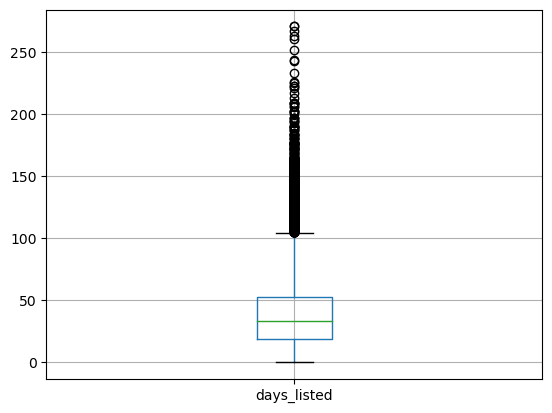

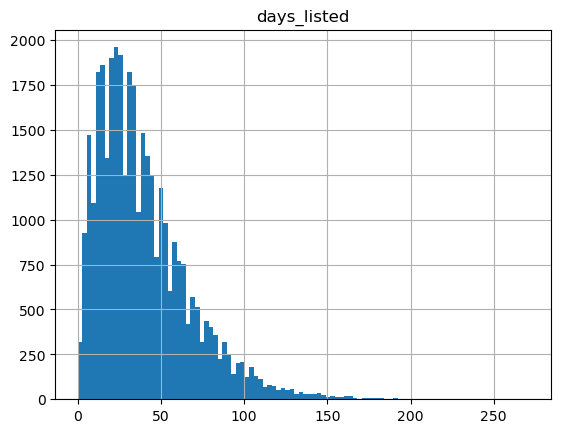

In [93]:
gral_plot_param(vh_sample,'days_listed')

Valores generales del parametro: odometer
count     36249.000000
mean     124667.841568
std       49274.626111
min           0.000000
25%       99000.000000
50%      115088.000000
75%      155500.000000
max      250000.000000
Name: odometer, dtype: float64


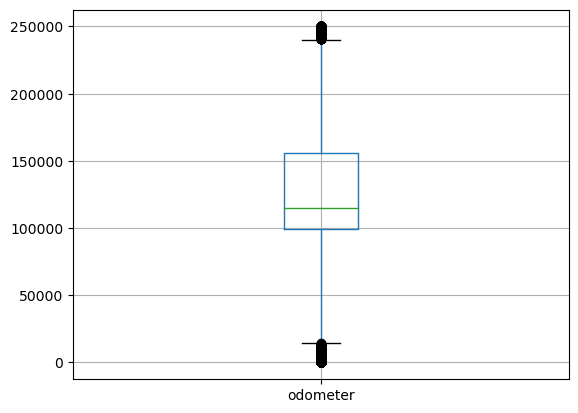

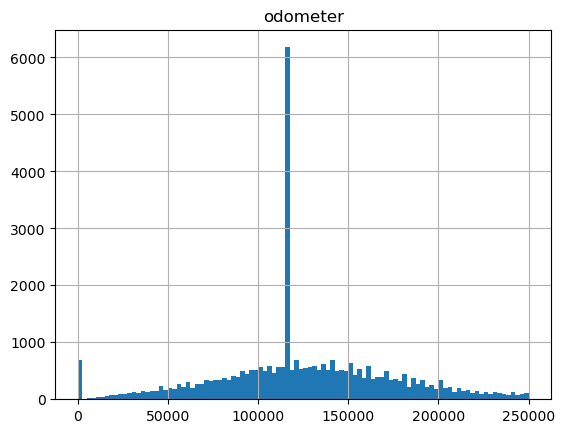

In [94]:
gral_plot_param(vh_sample,'odometer')

In [95]:
print(vh_sample.query('days_listed  <= 100').pivot_table(index=['condition'],values=['price','days_listed','model_year'],aggfunc=('mean','median','count')))
print()
print(vh_sample.query('days_listed  > 100').pivot_table(index=['condition'],values=['price','days_listed','model_year'],aggfunc=('mean','median','count')))

          days_listed                   model_year                       \
                count       mean median      count         mean  median   
condition                                                                 
new                54  38.759259   38.0         54  2011.666667  2012.0   
recovery           98  34.530612   28.0         98  2005.571429  2004.5   
regular         15573  36.341103   32.0      15573  2007.219739  2007.0   
semi new        19142  36.230331   32.0      19142  2009.903249  2011.0   

           price                       
           count         mean  median  
condition                              
new           54  6959.574074  6650.0  
recovery      98  3673.408163  2495.0  
regular    15573  6799.909587  5950.0  
semi new   19142  8841.256452  8499.0  

          days_listed                    model_year                       \
                count        mean median      count         mean  median   
condition                                

## Precio promedio por cada tipo de vehículo

In [96]:
type_cost = vh_sample.pivot_table(index='type',values='price',aggfunc=('mean','count'))
print('Numero total de anuncios:',len(vh_sample))
type_cost.sort_values(by='count',ascending=False,inplace=True)
print(type_cost)

Numero total de anuncios: 36249
             count         mean
type                           
sedan        11457  6762.645457
SUV           8948  8137.014528
truck         6809  9467.571890
pickup        3952  8651.349190
wagon         1271  7731.116444
coupe         1095  7594.723288
hatchback      890  6546.640449
mini-van       856  6825.535047
van            435  7653.788506
convertible    222  9232.500000
other          176  8085.176136
offroad        127  9192.622047
bus             11  6533.272727


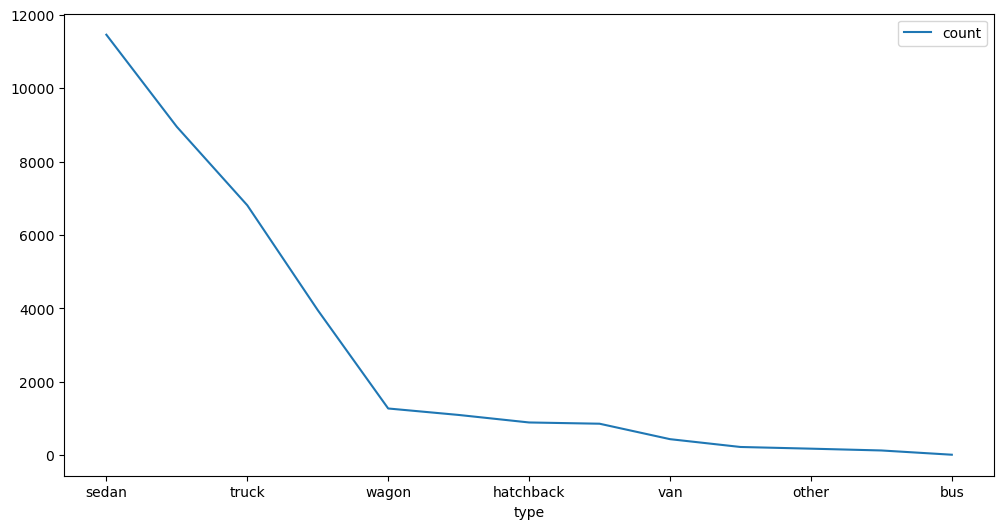

In [97]:
type_cost.plot(y='count',figsize=(12,6))
plt.show()

Tenemos que los tipos de autos que mas se anuncian son sedan y SUV

## Factores de precio

In [98]:
print(vh_sample.corr())

                price  model_year  cylinders  odometer    is_4wd  days_listed  \
price        1.000000    0.494174   0.167557 -0.324876  0.219408     0.002564   
model_year   0.494174    1.000000  -0.375799 -0.426757 -0.189001    -0.000205   
cylinders    0.167557   -0.375799   1.000000  0.280958  0.400933     0.001592   
odometer    -0.324876   -0.426757   0.280958  1.000000  0.181380     0.004395   
is_4wd       0.219408   -0.189001   0.400933  0.181380  1.000000     0.007721   
days_listed  0.002564   -0.000205   0.001592  0.004395  0.007721     1.000000   
date_year    0.006800    0.019352  -0.001777 -0.008035  0.001249     0.010159   
car_life    -0.492342   -0.995780   0.374718  0.424977  0.188654     0.001137   
odo_prom     0.274391    0.566545  -0.192845  0.086555 -0.085848     0.000713   

             date_year  car_life  odo_prom  
price         0.006800 -0.492342  0.274391  
model_year    0.019352 -0.995780  0.566545  
cylinders    -0.001777  0.374718 -0.192845  
odometer 

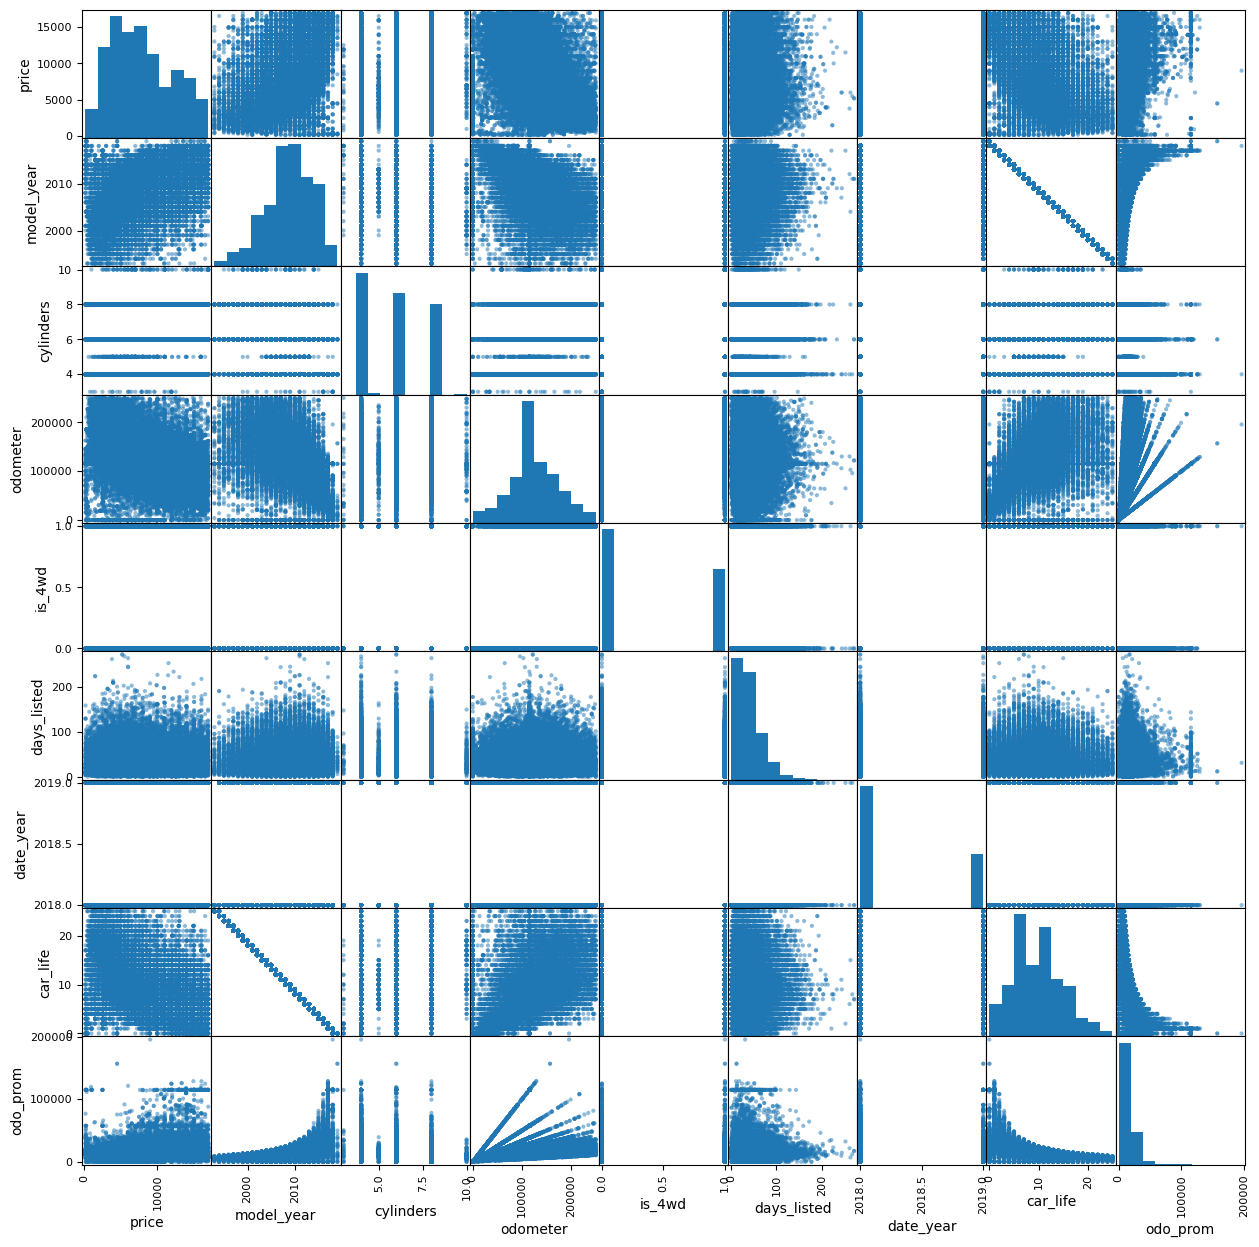

In [99]:
pd.plotting.scatter_matrix(vh_sample,figsize=(15,15))
plt.show()

              price
transmission       
automatic     34006
manual         1951
other           292


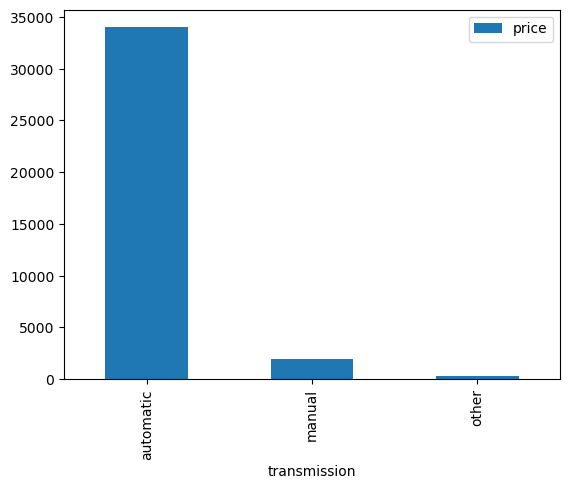

In [100]:
transmission_sample = vh_sample.pivot_table(index='transmission',values='price',aggfunc='count')
print(transmission_sample.sort_values(by='price',ascending=False))
transmission_sample.sort_values(by='price',ascending=False).plot(kind='bar')
plt.show()

             model
paint_color       
custom        7332
white         6355
black         5009
silver        4752
grey          3832
blue          3390
red           3250
green         1122
brown          911
orange         122
yellow         100
purple          74


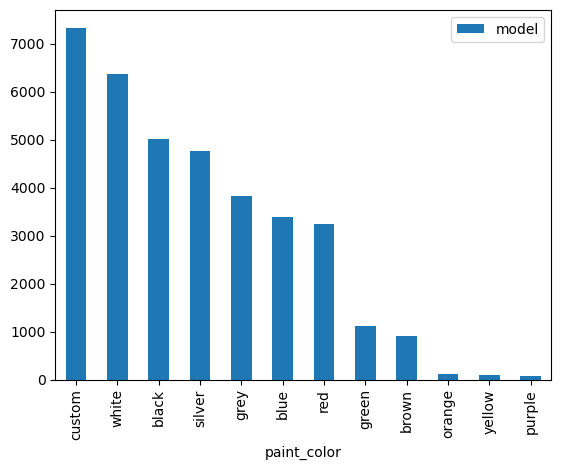

In [101]:
paint_sample = vh_sample.pivot_table(index='paint_color',values='model',aggfunc='count')
print(paint_sample.sort_values(by='model',ascending=False))
paint_sample.sort_values(by='model',ascending=False).plot(kind='bar')
plt.show()

             model
paint_color       
custom        7332
white         6355
black         5009
silver        4752
grey          3832
blue          3390
red           3250
green         1122
brown          911
orange         122
yellow         100
purple          74


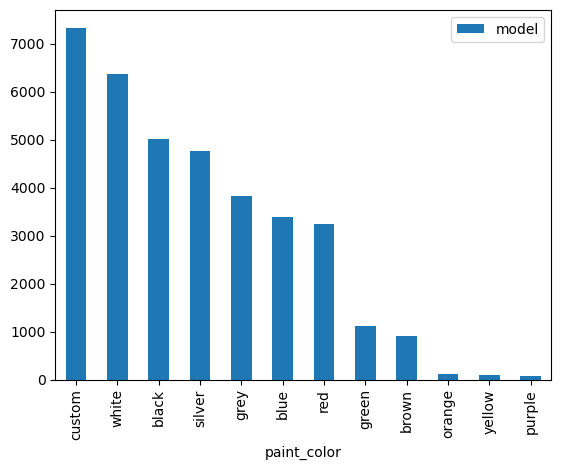

In [102]:
paint_sample = vh_sample.pivot_table(index='paint_color',values='model',aggfunc='count')
print(paint_sample.sort_values(by='model',ascending=False))
paint_sample.sort_values(by='model',ascending=False).plot(kind='bar')
plt.show()

## Conclusión general
-Primero observamos el panamora general y verificamos el tipo de dato, los datos ausentes, y comenzamos a rellenar estos datos de acuerdo a caracteristicas similares entre otros autos, ya que las catacteristicas similares tienden a ser iguales cuando se tiene cierto patron.\
-Para los valores de paint_color no se nos hizo relevante el color, por lo que llenamos los valores ausentes con el color custom.\
-En cuanto al parametro de is_4wd llenamos los valores ausentes asumiendo que los valores restantes eran 0, al solo haber 2 tipos de datos posibles en este parametro (0 y 1).\
-Procedimos a llenar datos ausentes de model_year con valores que correspondieran a las caracteristicas, tomando esas caracteristicas especificas como año de salida del modelo.\
-Para el odometro utilizamos un promedio para llenar estos valores.\
-Con los valores ya corregidos, graficamos con diagramas de caja los parametros importantes para darnos una idea de los valores atipicos y asi poder hacer un filtrado de datos para tener nuestra muestra y nuestro grafico con datos mas consisos y sin valores atipicos.\
-Sobre esto podemos graficar nuevamente y observando que el precio es afectado principalmente por el model_year, odometer y car_life.


